# Get the data into our notebook

> <font size="5"> 📚 Check out the [Github reference](https://github.com/mrdbourke/tensorflow-deep-learning) of Daniel Bourke </font> 

## IMPORTS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from itertools import compress
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Download the data with wget

In [2]:
if "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" in os.listdir():
    print('CSV file already downloaded and accessible in the directory')
else:
    try:
        !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
    except:
        print("command wget not working - Install by 'brew install wget'")

CSV file already downloaded and accessible in the directory


## Import CSV with pandas

In [3]:
# read in data from csv
# fromat dates to datetime and set as index
path = 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'
df = pd.read_csv(path,sep=',',parse_dates=['Date'],index_col = 'Date')

In [4]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


## Plot the data using pandas

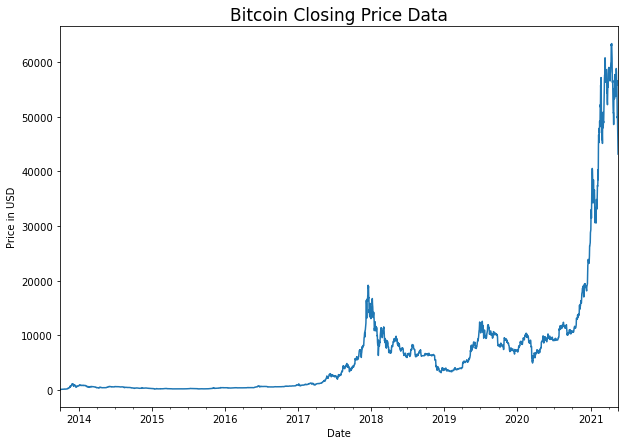

In [7]:
df.iloc[:,1].plot(figsize=(10,7))
plt.title('Bitcoin Closing Price Data',fontsize=17)
plt.ylabel('Price in USD')
plt.show()

> 🔑 **Seasonality**: The seasonality of time series data is how many samples do we have of this data per year. So for our Bitcoin data we have a saisonality of daily or a value of 365.

In [8]:
bitcion_prices = df[['Closing Price (USD)']].rename(columns={'Closing Price (USD)':'Price'})

In [9]:
bitcion_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [10]:
bitcion_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


## Read in the data using pythons csv module

In [11]:
from datetime import datetime

In [12]:
import csv
with open(path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    next(csvfile) # skip header row
    dates = []
    prices = []
    for row in spamreader:
        dates.append(datetime.strptime(row[1],'%Y-%m-%d'))
        prices.append(float(row[2]))

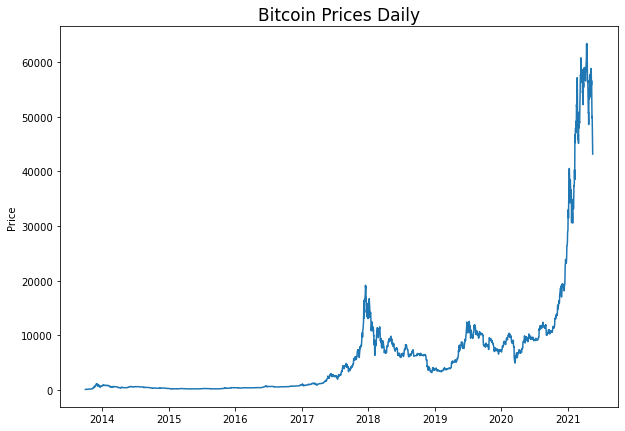

In [13]:
plt.figure(figsize=(10,7))
plt.plot(dates,prices)
plt.ylabel('Price')
plt.title('Bitcoin Prices Daily',fontsize=17)
plt.show()

# Prepare the data

## Create train and test splits

In [14]:
# 80% train and 20% test
split_size = int(len(bitcion_prices)*0.8)

# create train set
X_train,y_train = dates[:split_size], prices[:split_size]

# create test set
X_test, y_test = dates[split_size:], prices[split_size:]

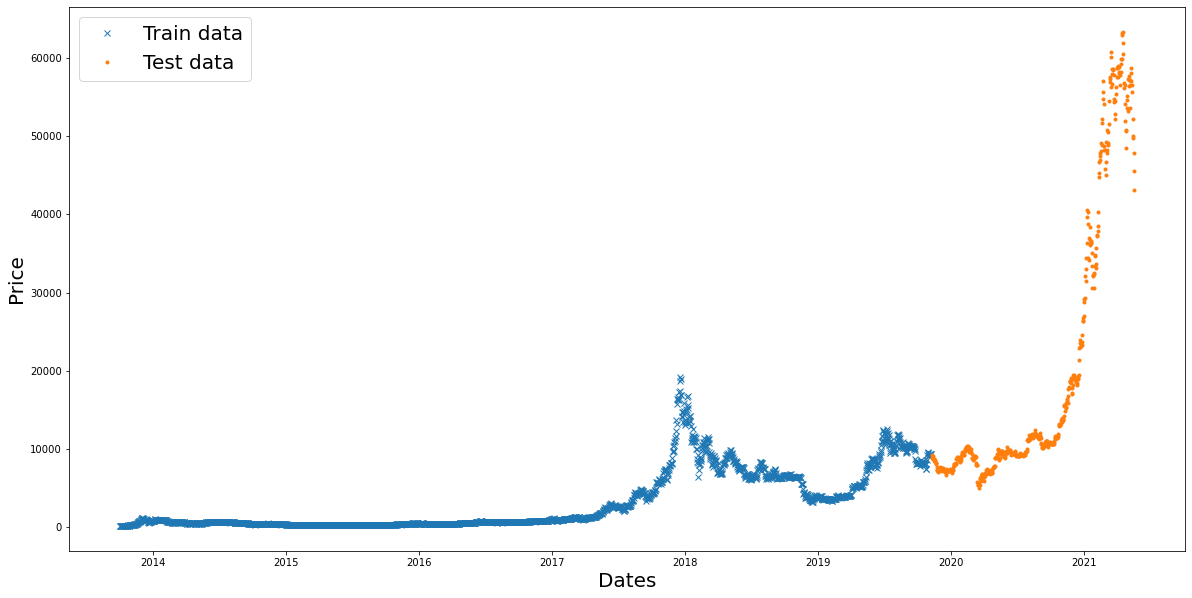

In [15]:
plt.figure(figsize=(20,10))
plt.plot(X_train,y_train,'x')
plt.plot(X_test,y_test,'.')
plt.legend(['Train data','Test data'],fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### Creating a plotting fuction

In [16]:
import matplotlib.pyplot as plt
# create a function to plot the data
def plot_time_series(timestamp,values,formated='.',start=0,end=None,label=None):
    """
    Plots our timeseries
    """
    plt.plot(timestamp[start:end],values[start:end],formated,label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

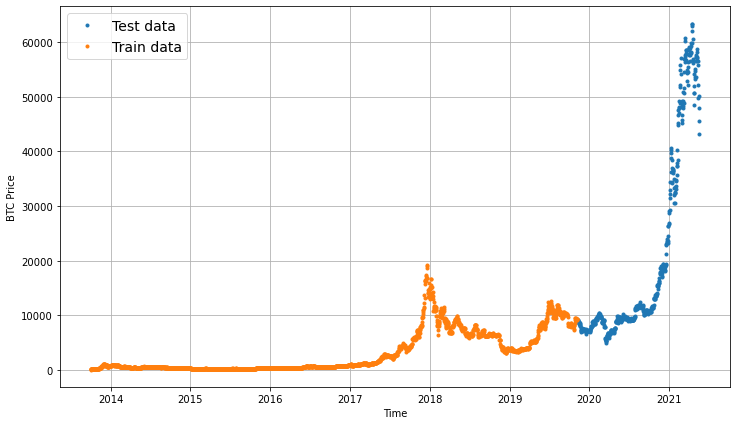

In [17]:
plt.figure(figsize=(12,7))
plot_time_series(X_test,y_test,label='Test data')
plot_time_series(X_train,y_train,label='Train data')

# Model 0 - Naive Time Series Model

Model Formula: $y_{t + 1} = y_t $

In [18]:
# create the Naive baseline forecast
naive_forecast = y_test[:-1]

## Plot the naive forcast against test data

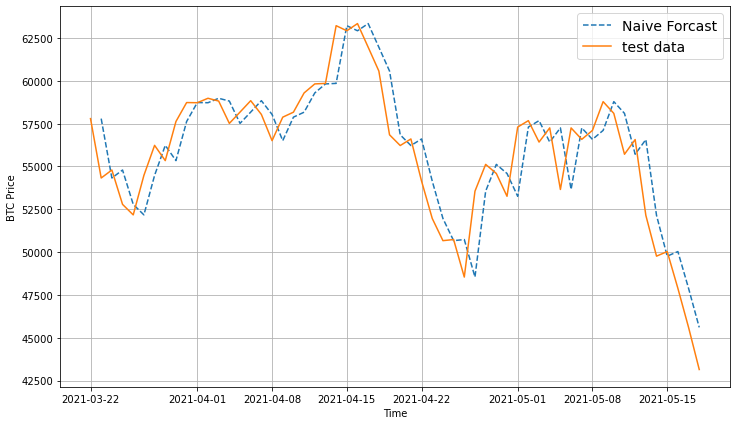

In [19]:
plt.figure(figsize=(12,7))
plot_time_series(X_test[1:],naive_forecast,start=500,end=1000, formated='--',label='Naive Forcast')
plot_time_series(X_test,y_test,start=500, end=1000,formated='-',label='test data')

## Evaluation of our Naive Model



### Implementing the MASE (Mean Absolute Scaled Error)

MASE = $\frac{\frac{1}{J}\sum_j |e_j|}{\frac{1}{T-1}\sum_{t=2}^{T} |Y_t - Y_{t-1}|} $\
where \
$e_j$ ... [__forcast error__](https://en.wikipedia.org/wiki/Forecast_error) (difference between the actual and predicted value) \
$j \in \{1,...,J\}$ with J as the number of forecasts (in our case $J=1$)


In [20]:
def get_mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nom = np.mean(np.abs((y_true-y_pred)))
    denom = np.mean(np.abs((y_true[1:]-y_true[:-1])))
    return nom/denom

In [21]:
mase = get_mase(y_test[1:],naive_forecast)
print('MASE has a value of %.3f'%mase)

MASE has a value of 1.000


In [22]:
# create a function to evaluate our predictions
def evaluate_preds(y_true,y_pred):
    # tensorflow uses datatype float32 by default
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)
    
    # calculate statistics
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase = get_mase(y_true,y_pred)
    
    return({
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': mape.numpy(),
        'mase': mase
    })

In [23]:
len(naive_forecast)

557

In [24]:
len(y_test)

558

In [25]:
naive_results = evaluate_preds(y_test[1:],naive_forecast)
naive_results

Metal device set to: Apple M1 Pro


2022-02-20 20:12:38.247648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-20 20:12:38.247803: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Format data part 2: windowing out dataset

We window our dataset to turn our problem into a supervised learning problem

In [26]:
# Set up some global varibales
HORIZON = 1 # how long we are going to predict into the future
WINDOW_SIZE = 7 # how many past days we use to make the prediction

In [27]:
print(f"We want to use this: {prices[:WINDOW_SIZE]} to predict this: {prices[WINDOW_SIZE]}")

We want to use this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [28]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
    """
        Function to create labels for windowed dataset. 
    """
    return x[:, :-horizon], x[:,-horizon:]

In [29]:
test_window, test_label =  get_labelled_windows(tf.expand_dims(tf.range(8),axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

📚**Ressource**: [Towards Data Science - Fast and Robust Sliding Window Vectorization with NumPy](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5)

In [30]:
import numpy as np

In [31]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    '''
        Function that turns a 1D array to 2D array of sequential labelled windows of window_size and horizon size labels
    '''
    
    # 1. Create a window of window_size
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    # 2. Use numpy indexing to create 2D array of multiple windows 
    windows_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    
    # 3. Indexing on the target array
    windowed_array = x[windows_indexes]#
    
    # get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    
    return(windows, labels)

In [32]:
full_windows, full_labels = make_windows(np.array(prices))

In [33]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Turning our windows into train and test sets

In [34]:
def make_train_test_splits(windows, labels, test_split=0.2):
    """
        Function that splits matching pairs of windows and labels into train and test splits
    """
    split_size = int(len(windows) * (1 - test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [35]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)

In [36]:
# check if our training labels are equal to before
np.array_equal(np.squeeze(train_labels)[:-HORIZON-1],y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

In [37]:
import os

In [38]:
def create_model_checkpoint(model_name, save_path = "model_experiments", verbose=0, sbo=True):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              monitor='val_loss',
                                             verbose=verbose,
                                             save_best_only = sbo)

# Model 1 - Dense Model (window size = 7, horizon = 1)

## Using functional API

In [39]:
from tensorflow.keras import layers

# define the input shape
input_shape = (7,)
# define input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# define middle dense layer
dense = layers.Dense(128, activation='relu', name='dense_layer')(inputs)

# define output layer
outputs = layers.Dense(1, name='output_layer')(dense)

model_1 = tf.keras.Model(inputs, outputs,name='model_1_dense')

## Using Sequential API

In [40]:
# 1. create the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# 2. compile the model
model_1.compile(
    loss = 'mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae','mse']
)

# 3. fit the model
model_1.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows,test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100


2022-02-20 20:12:38.393381: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-20 20:12:38.512737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 384.7091 - mae: 384.7091 - mse: 664474.3125

2022-02-20 20:12:38.759462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-20 20:12:38.867201: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


18/18 [==============================] - 1s 23ms/step - loss: 384.7091 - mae: 384.7091 - mse: 664474.3125 - val_loss: 1869.5142 - val_mae: 1869.5142 - val_mse: 9943806.0000
Epoch 2/100
18/18 [==============================] - 0s 19ms/step - loss: 286.7044 - mae: 286.7044 - mse: 403771.9062 - val_loss: 1530.1443 - val_mae: 1530.1443 - val_mse: 7254683.0000
Epoch 3/100
18/18 [==============================] - 0s 15ms/step - loss: 271.2324 - mae: 271.2324 - mse: 363343.0625 - val_loss: 1429.9202 - val_mae: 1429.9202 - val_mse: 6637162.0000
Epoch 4/100
18/18 [==============================] - 0s 16ms/step - loss: 258.5862 - mae: 258.5862 - mse: 336200.4375 - val_loss: 1373.7976 - val_mae: 1373.7976 - val_mse: 6107681.5000
Epoch 5/100
18/18 [==============================] - 0s 15ms/step - loss: 245.6018 - mae: 245.6018 - mse: 307157.6250 - val_loss: 1328.4343 - val_mae: 1328.4343 - val_mse: 5653391.0000
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 235.7446 - mae

In [41]:
# load in the saved best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")

In [42]:
# evaluate the model
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 581.5063 - mae: 581.5063 - mse: 1197440.0000


2022-02-20 20:12:58.047565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[581.5062866210938, 581.5062866210938, 1197440.0]

In [43]:
model_1_preds = model_1.predict(test_windows)

2022-02-20 20:12:58.191032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [44]:
naive_results

{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [45]:
# let's write a function to make forcasts for any kind of model
def make_preds(model, X_test, y_test):
    """
        Function that takes in a trained model, makes predictions on X_test and computes evaluation metrics with comparison betwenn y_test and the predictions.
    """
    y_pred = model.predict(X_test)
    
    return evaluate_preds(y_test.reshape(-1,),y_pred.reshape(-1,))

In [46]:
model_1_results = make_preds(model_1, test_windows, test_labels)
model_1_results

{'mae': 581.5063,
 'mse': 1197440.0,
 'rmse': 1094.276,
 'mape': 2.6491423,
 'mase': 1.0215455}

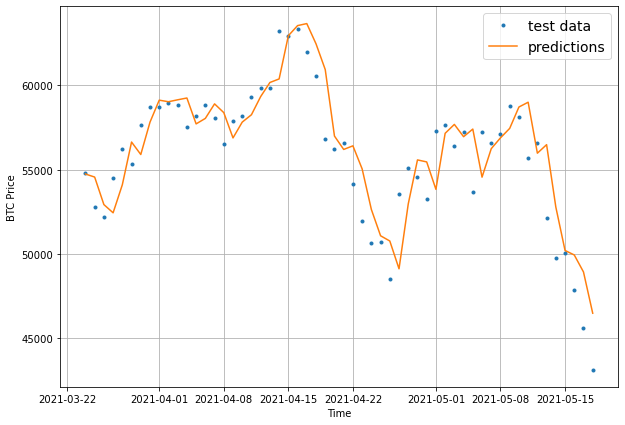

In [47]:
# Lets plot our model 1 predictions

offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_1_preds[:,0],
    formated='-',
    start=offset,
    label="predictions"          
)

# Model 2 - Dense (window = 30, horizon = 1)

In [48]:
HORIZON = 1
WINDOW_SIZE = 30

In [49]:
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon = HORIZON)

In [50]:
len(full_windows), len(full_labels)

(2757, 2757)

In [51]:
# create train and test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)

In [52]:
# take a look a the data 
print(f"Window: {train_windows[0]} -> Labels: {train_labels[0]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Labels: [196.02499]


In [53]:
# 1. create model 2
model_2 = tf.keras.Sequential(name='model_2_dense')
model_2.add(layers.Dense(128,activation='relu'))
model_2.add(layers.Dense(1,activation='linear'))

# 2. compile the model
model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae','mse']
)

# 3. fit the model
model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows,test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 971.5103 - mae: 971.5103 - mse: 3612831.7500   

2022-02-20 20:12:58.495021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-20 20:12:58.686415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 19ms/step - loss: 818.9975 - mae: 818.9975 - mse: 2797553.7500 - val_loss: 2040.8877 - val_mae: 2040.8877 - val_mse: 12074900.0000
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 397.1854 - mae: 397.1854 - mse: 759236.5625 - val_loss: 1593.1329 - val_mae: 1593.1329 - val_mse: 7799695.0000
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 292.6678 - mae: 292.6678 - mse: 428706.9688 - val_loss: 1414.5450 - val_mae: 1414.5450 - val_mse: 6878325.0000
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 275.8466 - mae: 275.8466 - mse: 356683.2500 - val_loss: 1364.9117 - val_mae: 1364.9117 - val_mse: 6779400.5000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 252.0374 - mae: 252.0374 - mse: 322108.9688 - val_loss: 1738.7852 - val_mae: 1738.7852 - val_mse: 8314776.5000
Epoch 6/100
18/18 [==============================] - 0s 19ms/step - loss: 258.2064 - m

In [54]:
# evaluate model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 687.7391 - mae: 687.7391 - mse: 1574410.5000


[687.7391357421875, 687.7391357421875, 1574410.5]

In [55]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")

In [56]:
# evaluate best performing model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 627.1833 - mae: 627.1833 - mse: 1366568.5000


2022-02-20 20:13:15.778397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[627.183349609375, 627.183349609375, 1366568.5]

In [57]:
model_2_preds = model_2.predict(test_windows)

2022-02-20 20:13:15.912530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [58]:
model_2_results = make_preds(model_2,test_windows, test_labels)

In [59]:
model_2_results

{'mae': 627.1833,
 'mse': 1366568.4,
 'rmse': 1169.0032,
 'mape': 2.831757,
 'mase': 1.0963223}

In [60]:
model_1_results

{'mae': 581.5063,
 'mse': 1197440.0,
 'rmse': 1094.276,
 'mape': 2.6491423,
 'mase': 1.0215455}

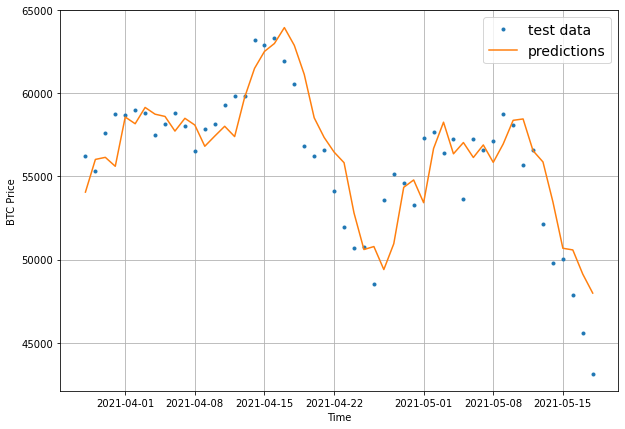

In [61]:
# Lets plot our model 1 predictions

offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_2_preds[:,0],
    formated='-',
    start=offset,
    label="predictions"          
)

# Model 3 - Dense Model (window = 30, horizon = 7)

In [62]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)

In [63]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [64]:
# 1. Create the model
model_3 = tf.keras.Sequential(name='model_3_dense')
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(HORIZON))

# 2. Compile the model
model_3.compile(
    loss='MAE',
    optimizer=tf.keras.optimizers.Adam()
)

# 3. Fit the Model
model_3.fit(
    train_windows, 
    train_labels, 
    epochs=100,
    batch_size = 128, 
    validation_data = (test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 2347.2322

2022-02-20 20:13:16.220473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-20 20:13:16.410988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 18ms/step - loss: 1937.4760 - val_loss: 2797.5498
Epoch 2/100
18/18 [==============================] - 0s 18ms/step - loss: 584.5167 - val_loss: 2766.4197
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 444.1893 - val_loss: 2213.9675
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 389.7390 - val_loss: 1980.5656
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 358.1426 - val_loss: 1837.4705
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 332.4442 - val_loss: 1839.5554
Epoch 7/100
18/18 [==============================] - 0s 13ms/step - loss: 315.6939 - val_loss: 1613.9401
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 296.9329 - val_loss: 1552.9240
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 284.9300 - val_loss: 1524.2568
Epoch 10/100
18/18 [==============================] - 0s 12ms/step 

In [65]:
# Evaluate the model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1315.2599


1315.2598876953125

In [66]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')

In [67]:
model_3_preds = model_3.predict(test_windows)

2022-02-20 20:13:29.484793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [68]:
model_3_preds.shape

(551, 7)

In [69]:
model_2_preds.shape

(552, 1)

In [70]:
model_3_results = make_preds(model_3,test_windows, test_labels)

In [71]:
model_3_results

{'mae': 1240.0509,
 'mse': 5368306.0,
 'rmse': 2316.9604,
 'mape': 5.52994,
 'mase': 1.8066657}

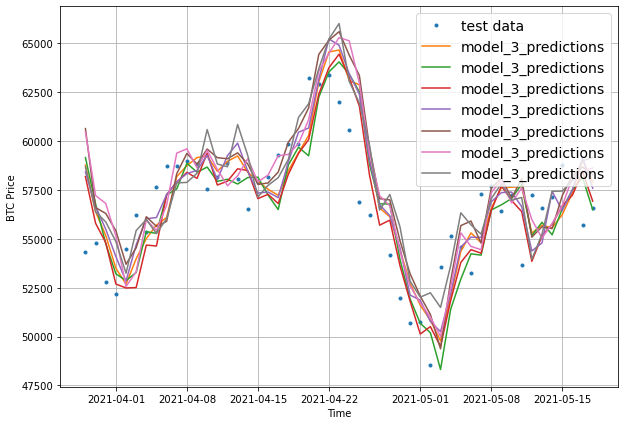

In [72]:
offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_3_preds,
    formated='-',
    start=offset,
    label="model_3_predictions"          
)

In [73]:
model_3_preds[0]

array([9363.635, 9317.242, 9332.545, 9285.602, 9440.899, 9547.125,
       9362.554], dtype=float32)

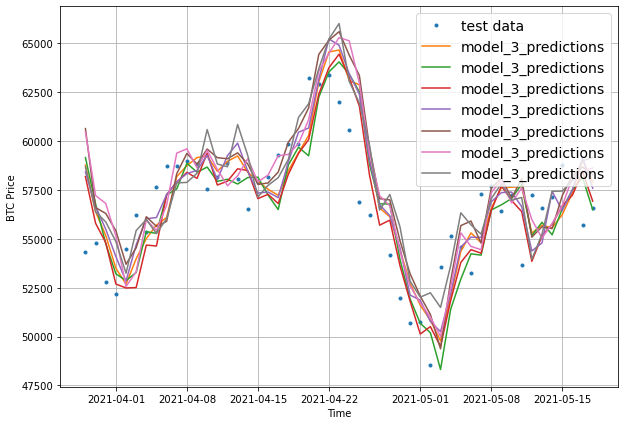

In [74]:
offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_3_preds,
    formated='-',
    start=offset,
    label="model_3_predictions"          
)

# Comparing our models trained so far

In [75]:
naive_results

{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [76]:
df_results = pd.DataFrame(
    {
        "Naive Model": naive_results,
        "Model 1": model_1_results,
        "Model 2": model_2_results,
        "Model 3": model_3_results
    }
)

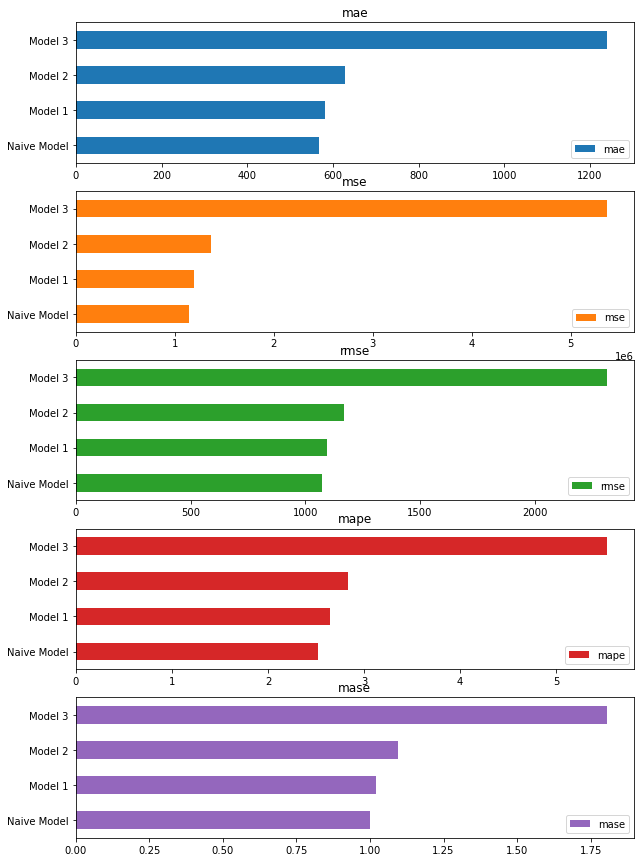

In [77]:
df_results.T.plot(kind='barh',subplots=True, figsize=(10,15),sharex=False)
plt.show()

# Model 4 - Conv1D

In [78]:
HORIZON = 1
WINDOW_SIZE = 7

In [79]:
# Create windowed dataset
full_windows, full_labels = make_windows(np.array(prices), WINDOW_SIZE, HORIZON)

In [80]:
len(full_windows), len(full_labels)

(2780, 2780)

In [81]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

## Preparing our data to be in the right input shape

In [82]:
train_windows[0].shape

(7,)

In [83]:
# Before we pass our data to the conv1d layer to reshape it in order to make everything work
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [84]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1)) # add an extra dimension for x

In [85]:
expand_dims_layer(x).shape, expand_dims_layer(x).ndim

(TensorShape([7, 1]), 2)

In [86]:
# we could to the same just using numpy 
np.array(x).reshape(-1,), np.array(x).reshape(-1,1)

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ]),
 array([[123.65499],
        [125.455  ],
        [108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ]]))

## Building model 4

In [87]:
# 1. Build the model
model_4 = tf.keras.Sequential(name='model_4')
model_4.add(layers.Lambda(lambda x: tf.expand_dims(x,axis=1)))
model_4.add(layers.Conv1D(filters=128,kernel_size=7,padding='causal',activation='relu'))
model_4.add(layers.Dense(HORIZON))

# 2. Compile the model
model_4.compile(
    loss=['MAE'],
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['MAE','MSE']
)

# 3. Fit the model
model_4.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]

)

Epoch 1/100
 8/18 [============>.................] - ETA: 0s - loss: 3411.0298 - MAE: 3411.0298 - MSE: 27985910.0000

2022-02-20 20:13:30.150176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/18 [===========================>..] - ETA: 0s - loss: 2558.9795 - MAE: 2558.9795 - MSE: 17785750.0000

2022-02-20 20:13:30.413487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 30ms/step - loss: 2522.9604 - MAE: 2522.9604 - MSE: 17449150.0000 - val_loss: 5270.1997 - val_MAE: 5270.1997 - val_MSE: 50861796.0000
Epoch 2/100
18/18 [==============================] - 0s 19ms/step - loss: 405.7151 - MAE: 405.7151 - MSE: 576362.3125 - val_loss: 1265.9332 - val_MAE: 1265.9332 - val_MSE: 5006000.5000
Epoch 3/100
18/18 [==============================] - 0s 19ms/step - loss: 224.8158 - MAE: 224.8158 - MSE: 229930.4062 - val_loss: 1067.9583 - val_MAE: 1067.9583 - val_MSE: 3817027.2500
Epoch 4/100
18/18 [==============================] - 0s 19ms/step - loss: 193.1721 - MAE: 193.1721 - MSE: 189384.5625 - val_loss: 1030.2905 - val_MAE: 1030.2905 - val_MSE: 3474361.7500
Epoch 5/100
18/18 [==============================] - 0s 20ms/step - loss: 183.1933 - MAE: 183.1933 - MSE: 177842.6250 - val_loss: 1010.9822 - val_MAE: 1010.9822 - val_MSE: 3440181.7500
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 180.1039 

In [88]:
# print the summary
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [89]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Evaluate the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 672.8408 - MAE: 672.8408 - MSE: 1424291.0000


[672.8407592773438, 672.8407592773438, 1424291.0]

In [91]:
model_4 = tf.keras.models.load_model('model_experiments/model_4')

In [92]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 570.9988 - MAE: 570.9988 - MSE: 1192235.6250


2022-02-20 20:13:54.928424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[570.9988403320312, 570.9988403320312, 1192235.625]

In [93]:
# make predictions first
model_4_preds = model_4.predict(test_windows)

2022-02-20 20:13:55.106768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [94]:
model_4_results = make_preds(model_4, test_windows, test_labels)
model_4_results

{'mae': 570.99884,
 'mse': 1192235.5,
 'rmse': 1091.8954,
 'mape': 2.5602005,
 'mase': 1.0030868}

# Model 5 -  (LSTM)

In [95]:
train_windows[0].shape

(7,)

In [96]:
# build model 5
inputs = layers.Input(shape=(WINDOW_SIZE))

# for the lstm we need the same input shape as for conv1d
# so we add another lambda layer for reshaping
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)


# define the LSTM layer
# use return_sequences = True for LSTM layer stacking
#x = layers.LSTM(128, return_sequences=True)(x)
# ATTENTION: Must use of activation = RELU to make the training work
x = layers.LSTM(128, activation='relu')(x)

# define the final output layers
#x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, outputs, name='model_5_LSTM')

In [97]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [98]:
# compile the model
model_5.compile(
    loss='MAE',
    optimizer=tf.keras.optimizers.Adam()
)
with tf.device('/CPU:0'):
    model_5.fit(
        train_windows,
        train_labels,
        epochs=100,
        batch_size=128,
        validation_data=(test_windows, test_labels),
        callbacks=[create_model_checkpoint(model_name=model_5.name)]
    )

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2470.8230

2022-02-20 20:13:55.594487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-20 20:13:55.858169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 47ms/step - loss: 2008.0187 - val_loss: 5095.3193
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 382.3827

18/18 [==============================] - 1s 37ms/step - loss: 370.5737 - val_loss: 1307.9065
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 223.1234

18/18 [==============================] - 1s 38ms/step - loss: 211.6372 - val_loss: 1057.8206
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 192.1627 - val_loss: 1136.1941
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 185.9893 - val_loss: 1085.5056
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 184.0354 - val_loss: 1065.5432
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 173.1778

18/18 [==============================] - 1s 37ms/step - loss: 180.2410 - val_loss: 1001.7499
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 168.9264

18/18 [==============================] - 1s 45ms/step - loss: 160.8341 - val_loss: 992.6624
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 162.1093

18/18 [==============================] - 1s 37ms/step - loss: 158.3148 - val_loss: 855.6097
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 158.1709 - val_loss: 917.6867
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 164.0692 - val_loss: 926.2255
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 168.5883 - val_loss: 923.8434
Epoch 13/100
18/18 [==============================] - 0s 7ms/step - loss: 163.7626 - val_loss: 954.5323
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 174.7253 - val_loss: 935.0846
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 175.6662 - val_loss: 996.8619
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 173.0487 - val_loss: 982.1113
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 159.8676 - val_loss: 924.1055
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 15

18/18 [==============================] - 1s 38ms/step - loss: 158.7584 - val_loss: 853.0519
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 155.4734 - val_loss: 971.6079
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 159.8258

18/18 [==============================] - 1s 45ms/step - loss: 153.7053 - val_loss: 828.7984
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 153.3094 - val_loss: 1018.7621
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 154.9697

18/18 [==============================] - 1s 38ms/step - loss: 151.8044 - val_loss: 809.9575
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 149.8816 - val_loss: 829.5437
Epoch 26/100
11/18 [=================>............] - ETA: 0s - loss: 134.0238

18/18 [==============================] - 1s 37ms/step - loss: 142.8934 - val_loss: 792.4141
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 143.2014 - val_loss: 804.9216
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 138.3973

18/18 [==============================] - 1s 45ms/step - loss: 139.7469 - val_loss: 771.3171
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 140.4167 - val_loss: 788.7145
Epoch 30/100
11/18 [=================>............] - ETA: 0s - loss: 136.4277

18/18 [==============================] - 1s 38ms/step - loss: 136.0707 - val_loss: 754.7753
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 141.8200

18/18 [==============================] - 1s 38ms/step - loss: 134.4947 - val_loss: 748.6180
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 136.2702

18/18 [==============================] - 1s 38ms/step - loss: 133.3310 - val_loss: 741.4404
Epoch 33/100
10/18 [===============>..............] - ETA: 0s - loss: 138.2224

18/18 [==============================] - 1s 46ms/step - loss: 133.0465 - val_loss: 728.8076
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 137.2487

18/18 [==============================] - 1s 37ms/step - loss: 132.3966 - val_loss: 724.7146
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 131.1266 - val_loss: 752.0734
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 126.3070

18/18 [==============================] - 1s 35ms/step - loss: 128.5293 - val_loss: 712.8512
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 130.0640 - val_loss: 748.8043
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 132.1657

18/18 [==============================] - 1s 44ms/step - loss: 126.3615 - val_loss: 694.0043
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 116.2919

18/18 [==============================] - 1s 37ms/step - loss: 126.2329 - val_loss: 686.8667
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 132.0472 - val_loss: 712.9081
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 128.4020 - val_loss: 692.2010
Epoch 42/100
12/18 [===================>..........] - ETA: 0s - loss: 132.0403

18/18 [==============================] - 1s 35ms/step - loss: 128.6078 - val_loss: 671.3427
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 123.5524 - val_loss: 700.4478
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 127.5957 - val_loss: 711.9403
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 120.3304

18/18 [==============================] - 1s 58ms/step - loss: 123.2506 - val_loss: 669.0785
Epoch 46/100
18/18 [==============================] - 0s 9ms/step - loss: 121.7132 - val_loss: 692.6107
Epoch 47/100
13/18 [====================>.........] - ETA: 0s - loss: 116.8931

18/18 [==============================] - 1s 41ms/step - loss: 120.0941 - val_loss: 657.2369
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 118.8484

18/18 [==============================] - 1s 36ms/step - loss: 120.9185 - val_loss: 649.6760
Epoch 49/100
13/18 [====================>.........] - ETA: 0s - loss: 122.8420

18/18 [==============================] - 1s 40ms/step - loss: 121.7001 - val_loss: 646.5079
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 118.6689 - val_loss: 646.6688
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 122.5262 - val_loss: 661.9929
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 120.5530 - val_loss: 673.2475
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 121.2066 - val_loss: 664.9629
Epoch 54/100
13/18 [====================>.........] - ETA: 0s - loss: 125.9666

18/18 [==============================] - 1s 34ms/step - loss: 120.3457 - val_loss: 632.3130
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 119.9055 - val_loss: 642.0997
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 114.9683

18/18 [==============================] - 1s 36ms/step - loss: 116.7496 - val_loss: 627.9710
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 120.7671 - val_loss: 642.2537
Epoch 58/100
13/18 [====================>.........] - ETA: 0s - loss: 114.4258

18/18 [==============================] - 1s 44ms/step - loss: 118.1307 - val_loss: 627.0980
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1381 - val_loss: 658.7642
Epoch 60/100
13/18 [====================>.........] - ETA: 0s - loss: 115.3227

18/18 [==============================] - 1s 37ms/step - loss: 117.3004 - val_loss: 621.3270
Epoch 61/100
11/18 [=================>............] - ETA: 0s - loss: 108.6679

18/18 [==============================] - 1s 38ms/step - loss: 115.7454 - val_loss: 618.7765
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1289 - val_loss: 628.6139
Epoch 63/100
14/18 [======================>.......] - ETA: 0s - loss: 122.5533

18/18 [==============================] - 1s 33ms/step - loss: 115.9709 - val_loss: 616.2358
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 116.6393 - val_loss: 619.1545
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6268 - val_loss: 664.5178
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 120.1627 - val_loss: 631.2705
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9842 - val_loss: 640.2174
Epoch 68/100
13/18 [====================>.........] - ETA: 0s - loss: 115.3197

18/18 [==============================] - 1s 42ms/step - loss: 115.2042 - val_loss: 612.7418
Epoch 69/100
11/18 [=================>............] - ETA: 0s - loss: 108.9400

18/18 [==============================] - 1s 36ms/step - loss: 113.8891 - val_loss: 610.7310
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 118.0481

18/18 [==============================] - 1s 37ms/step - loss: 113.7833 - val_loss: 608.8376
Epoch 71/100
12/18 [===================>..........] - ETA: 0s - loss: 108.4181

18/18 [==============================] - 1s 44ms/step - loss: 113.7857 - val_loss: 605.0750
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7268 - val_loss: 605.9396
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 115.1561 - val_loss: 634.2003
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 114.1929 - val_loss: 639.2935
Epoch 75/100
14/18 [======================>.......] - ETA: 0s - loss: 123.8049

18/18 [==============================] - 1s 36ms/step - loss: 119.9991 - val_loss: 600.3159
Epoch 76/100
12/18 [===================>..........] - ETA: 0s - loss: 119.3193

18/18 [==============================] - 1s 37ms/step - loss: 114.3670 - val_loss: 598.7348
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 117.8009 - val_loss: 689.9114
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 118.3321 - val_loss: 625.1848
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 114.2509 - val_loss: 600.2130
Epoch 80/100
13/18 [====================>.........] - ETA: 0s - loss: 112.3453

18/18 [==============================] - 1s 42ms/step - loss: 112.1040 - val_loss: 597.9492
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 114.7804 - val_loss: 611.6237
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5041 - val_loss: 660.5850
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 115.3253 - val_loss: 622.4918
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2110 - val_loss: 604.7896
Epoch 85/100
13/18 [====================>.........] - ETA: 0s - loss: 110.6709

18/18 [==============================] - 1s 36ms/step - loss: 113.4381 - val_loss: 594.5703
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3788 - val_loss: 612.5613
Epoch 87/100
13/18 [====================>.........] - ETA: 0s - loss: 109.9283

18/18 [==============================] - 1s 35ms/step - loss: 111.5027 - val_loss: 590.5897
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3327 - val_loss: 614.6050
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8078 - val_loss: 611.5783
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0804 - val_loss: 614.4803
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1138 - val_loss: 599.8824
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4315 - val_loss: 613.7283
Epoch 93/100
14/18 [======================>.......] - ETA: 0s - loss: 114.3616

18/18 [==============================] - 1s 43ms/step - loss: 112.2585 - val_loss: 586.5542
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2617 - val_loss: 662.3047
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9999 - val_loss: 639.3351
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0995 - val_loss: 603.7099
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6644 - val_loss: 646.2330
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4895 - val_loss: 596.5745
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2775 - val_loss: 633.3121
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5966 - val_loss: 605.5362


In [99]:
# load in the best version of the model an evaluate
model_5 = tf.keras.models.load_model('model_experiments/model_5_LSTM')

In [100]:
with tf.device('CPU'):
    model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 586.5541


2022-02-20 20:14:29.569118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [101]:
with tf.device('CPU'):
    model_5_preds = model_5.predict(test_windows)

2022-02-20 20:14:29.681944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [102]:
with tf.device('CPU'):
    model_5_results = make_preds(model_5, test_windows, test_labels)

In [103]:
model_5_results

{'mae': 586.5542,
 'mse': 1234096.2,
 'rmse': 1110.8988,
 'mape': 2.6605182,
 'mase': 1.0304133}

In [104]:
model_1_results, model_2_results, model_3_results, model_4_results

({'mae': 581.5063,
  'mse': 1197440.0,
  'rmse': 1094.276,
  'mape': 2.6491423,
  'mase': 1.0215455},
 {'mae': 627.1833,
  'mse': 1366568.4,
  'rmse': 1169.0032,
  'mape': 2.831757,
  'mase': 1.0963223},
 {'mae': 1240.0509,
  'mse': 5368306.0,
  'rmse': 2316.9604,
  'mape': 5.52994,
  'mase': 1.8066657},
 {'mae': 570.99884,
  'mse': 1192235.5,
  'rmse': 1091.8954,
  'mape': 2.5602005,
  'mase': 1.0030868})

# Model 6 - same as Model 1 with additional feature

## Make a multivariate dataset

In [105]:
# adding a new feature to our dataset that uses the block reward on the current date
block_reward_1 = 50 # 3.09.2009 - not in our dataset yet, too early
block_reward_2 = 25 # 8.11.2012
block_reward_3 = 12.5 # 9.7.2016
block_reward_4 = 6.25 # 18.5.2020
block_rewards = [block_reward_1,block_reward_2,block_reward_3,block_reward_4]

In [106]:
# create the dates
import datetime
halfing_date_1 = np.datetime64("2009-09-03")
halfing_date_2 = np.datetime64("2012-11-08")
halfing_date_3 = np.datetime64("2016-08-09")
halfing_date_4 = np.datetime64("2020-05-18")

In [107]:
# create block ranges
daterange_block_reward_1 = pd.date_range(halfing_date_1, halfing_date_2)
daterange_block_reward_2 = pd.date_range(halfing_date_2, halfing_date_3)
daterange_block_reward_3 = pd.date_range(halfing_date_3, halfing_date_4)
daterange_block_reward_4 = pd.date_range(halfing_date_4, datetime.datetime.today())
dateranges = [daterange_block_reward_1,daterange_block_reward_2,daterange_block_reward_3,daterange_block_reward_4]

In [108]:
bitcion_prices['block_reward'] = bitcion_prices.reset_index()[['Date']].applymap(lambda x: list(compress(block_rewards, [x in dateranges[i] for i in range(len(dateranges))]))[0]).values

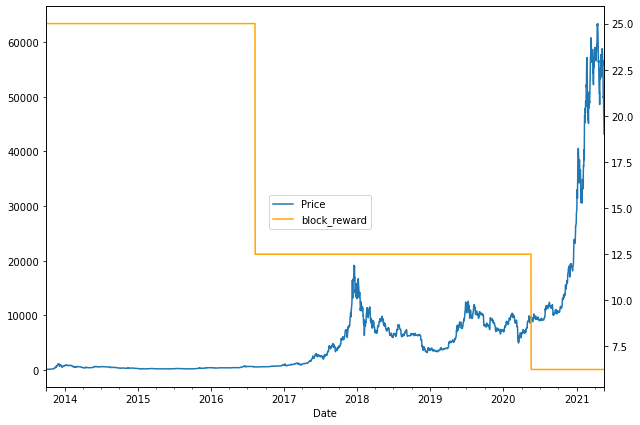

In [109]:
fig, ax = plt.subplots(figsize=(10,7))
bitcion_prices.iloc[:,0].plot(ax=ax)
ax2 = ax.twinx()
bitcion_prices.iloc[:,1].plot(ax=ax2,color='orange')
fig.legend(loc='center')
plt.show()

## Preparing our multivariate dataset

In [110]:
bitcoin_prices_windowed = bitcion_prices.copy()

In [111]:
# set up hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [112]:
## using pandas shift method to prepare our new dataset
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed.Price.shift(periods = i+1)

In [113]:
bitcoin_prices_windowed.head(10)
# each row now contains a week of prices, in the prices col we have the value that should be predicted

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25.0,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25.0,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25.0,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25.0,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [114]:
# create X and y features
X = bitcoin_prices_windowed.dropna().drop('Price',axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [115]:
X[:5], y[:5]

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

## Create train test splits

In [116]:
split_size = int(len(X)*0.8)
X_train, y_train, X_test, y_test = X[:split_size], y[:split_size], X[split_size:], y[split_size:]

In [117]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Build model 6 

In [118]:
# define the input shape
input_shape = (8,)
# define input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# define middle dense layer
dense = layers.Dense(128, activation='relu', name='dense_layer')(inputs)

# define output layer
outputs = layers.Dense(1, name='output_layer')(dense)

model_6 = tf.keras.Model(inputs, outputs,name='model_6_dense')

In [119]:
# compile the model
model_6.compile(
    loss='mae',
    optimizer = tf.keras.optimizers.Adam()
)

In [120]:
# fit the model
model_6.fit(
    X_train.values,
    y_train.values,
    epochs=100, 
    batch_size=128,
    validation_data = (X_test,y_test),
    callbacks=[create_model_checkpoint(model_name=model_6.name)]
)

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 2607.6384

2022-02-20 20:14:30.121716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-20 20:14:30.286075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 17ms/step - loss: 2283.2715 - val_loss: 2125.3567
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 403.0882 - val_loss: 1577.8440
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 254.5612 - val_loss: 1096.6362
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 197.1472 - val_loss: 1026.7892
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 187.3190 - val_loss: 1018.1498
Epoch 6/100
18/18 [==============================] - 0s 13ms/step - loss: 179.5581 - val_loss: 1005.7735
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 174.8675 - val_loss: 1075.5544
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 169.0430 - val_loss: 961.3576
Epoch 9/100
18/18 [==============================] - 0s 19ms/step - loss: 162.3496 - val_loss: 918.8613
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - l

In [121]:
# evaluate the model
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 567.5535


567.5535278320312

In [122]:
# load in the best model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense")

In [123]:
model_6_preds = model_6.predict(X_test)

model_6_results = evaluate_preds(y_test,np.squeeze(model_6_preds))

In [125]:
model_6_results

{'mae': 565.6569,
 'mse': 1165612.2,
 'rmse': 1079.6353,
 'mape': 2.5334527,
 'mase': 0.99370253}

In [126]:
model_1_results

{'mae': 581.5063,
 'mse': 1197440.0,
 'rmse': 1094.276,
 'mape': 2.6491423,
 'mase': 1.0215455}

# Model 7 - NBEATS

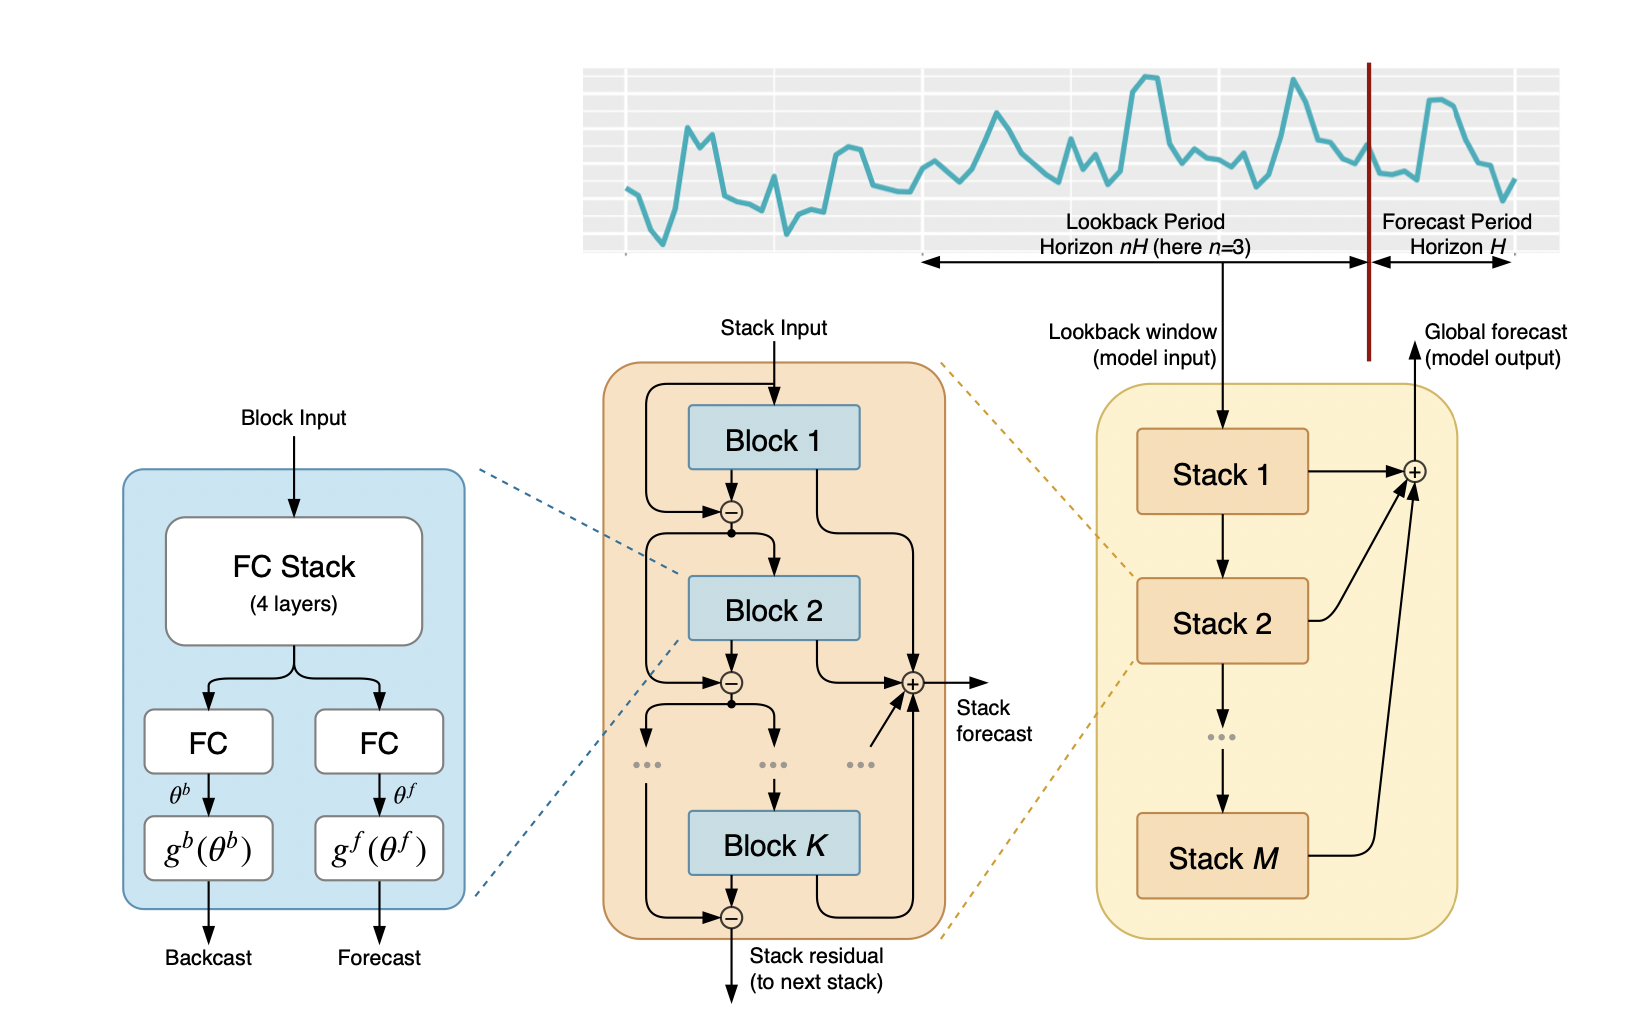

## Building the NBEATS Block Input part of the model

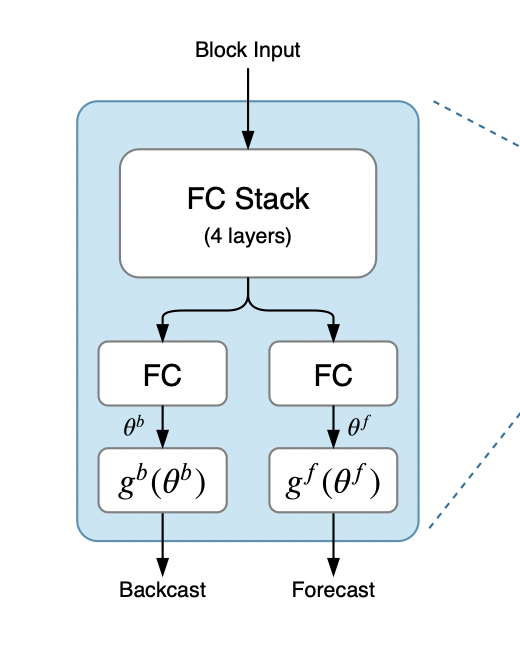 

to create the NBeatsBlock Layer we will subclass on the layer class from tensorflow, see e.g. [LINK](https://www.tensorflow.org/guide/keras/custom_layers_and_models)

In [157]:
# create nbeats custom block layer
class NBeatsBlock(tf.keras.layers.Layer):
    
    def __init__(self, 
                input_size: int, 
                theta_size: int,
                horizon: int, 
                n_neurons: int, 
                n_layers: int, 
                **kwargs): # takes care of all arguments in the parent class
        super().__init__(**kwargs)
        # initialize the variables
        self.input_size = input_size # is the window size we are using, input to the model
        self.theta_size = theta_size # number of neurons in the Dense Theta = Linear layer
        self.horizon = horizon # forecast period
        self.n_neurons = n_neurons # neurons in the hidden units
        self.n_layers = n_layers # how many hidden layers
        
        # code the logic
        
        # block contains stack of 4 fully connected layers with relu activation
        self.hidden = [tf.keras.layers.Dense(n_neurons,activation='relu') for _ in range(n_layers)]
        
        # create the theta layer = output of the block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name='theta')
        
    def call(self, inputs):
        x = inputs
        # pass inputs through the hidden layers
        for layer in self.hidden:
            x = layer(x)
        # pass it through the theta layer
        theta = self.theta_layer(x)
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        
        return backcast, forecast

Table 18 from the paper - N-BEATS G (Generic)

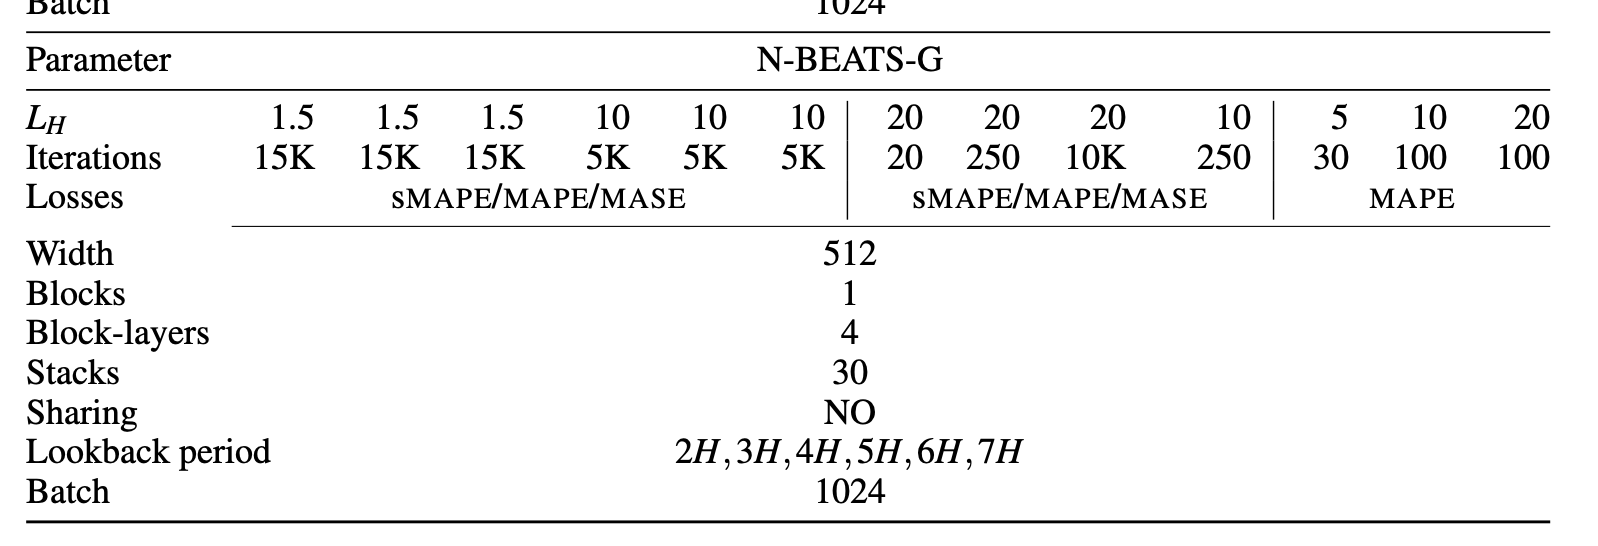

In [158]:
# try out the class with dummy parameters
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128, # paper: 512 (Width - see above)
                                       n_layers=4
)

In [159]:
# create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [160]:
# pass dummy inputs trough the dummy block
print(f'backcast:{np.squeeze(dummy_nbeats_block_layer(dummy_inputs)[0])} \
      \nforecast: {np.squeeze(dummy_nbeats_block_layer(dummy_inputs)[1])}')

backcast:[ 0.19974847  0.12746486  0.01586008 -0.4571471   0.5970079  -0.1390064
 -0.93500364]       
forecast: 0.27393680810928345


## preparing data with tf.data API

In [161]:
HORIZON = 1
WINDOW_SIZE = 7

In [162]:
# create the inputs
bitcion_prices_nbeats = bitcion_prices.drop('block_reward',axis=1)
bitcion_prices_nbeats.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [163]:
# create the windows
for i in range(WINDOW_SIZE):
    bitcion_prices_nbeats[f'Price+{i+1}'] = bitcion_prices_nbeats['Price'].shift(periods=i+1)

In [164]:
bitcion_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [165]:
# make features and labels
X = bitcion_prices_nbeats.dropna().drop('Price',axis=1)
y = bitcion_prices_nbeats.dropna().Price

In [166]:
# create train and test splits
split_size = int(len(bitcion_prices_nbeats)*0.8)

X_train, X_test, y_train, y_test = X[:split_size], X[split_size:], y[:split_size], y[split_size:]

In [167]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 551, 551)

In [168]:
# make our dataset perform faster with tf.data
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

In [169]:
# combine labels and features together -> ZIP
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))

test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

In [170]:
# batch and prefetch
BATCH_SIZE = 1024

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [171]:
train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

## Set the hyperparamters for N-BEATS

In [176]:
# values from NBEATS paper
# we use daily data

N_EPOCHS = 5000 # called iterations in the paper
N_NEURONS = 512 # called width in the paper
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called lookback period in the paper
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

In [173]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

In [174]:
# subtract 
subtracted = layers.subtract([tensor_1, tensor_2])
subtracted

# add
added = layers.add([tensor_1, tensor_2])
added

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>

## Building, Compiling and Fitting the N-BEATS Algorithm

1. Setup an instance of the N-BEATS block layer using our `NBeatsBlock` class
2. Create an Input Layer for the N-BEATS Block (using tensorflow functional API)
3. Make the initial forecasts and backcasts for the model using the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return forcasts and backcasts
6. Create the double residual stacking using add and subtract layers 
7. Put the model add and subtract outputs together using `tf.keras.Model`
8. Compile the model with MAE loss and Adam optimizer
9. Fit the N-Beats model for 5000 epochs and use the following callbacks
    * Early Stopping
    * Reduce LR on Plateu

In [177]:
%%time

# set the seed
tf.random.set_seed(75)

# 1. Setup NBeatsBlock class instance
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock'
)

# 2. Create Input Layer
stack_input = layers.Input(shape=(INPUT_SIZE), name='stack_input')

# 3. Make initial backcasts and forecasts input
residuals, forecast = nbeats_block_layer(stack_input)

# 4. create stack of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)
    
    # 5. use nbeats block to caculcate fore- and backcast
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name=f'NBeatsBlock_{i}'
    )(residuals)
    
    # 6. create double residual stacking
    residuals = layers.subtract([residuals , backcast],name=f'subtract_{i}')
    forecast = layers.add([forecast, block_forecast],name=f'add_{i}')
    
# 7. put together inputs and outputs
model_7 = tf.keras.Model(stack_input, forecast, name='model_7_NBEATS')

# 8. compile the model
model_7.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam()
)

# 9. fit the model
model_7.fit(
    train_dataset,
    epochs=N_EPOCHS,
    validation_data = test_dataset,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=200,restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=100,verbose=1)
    ]
    
)

2022-02-20 21:29:56.734673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-20 21:30:02.354994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00886: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 01141: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 01241: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 30s, sys: 2min 11s, total: 7min 42s
Wall time: 7min 6s


In [178]:
# evaluate the model
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 36ms/step - loss: 577.2401


577.2401123046875

In [179]:
model_7_preds = model_7.predict(X_test)

model_7_results = evaluate_preds(y_test,np.squeeze(model_7_preds))

2022-02-20 21:37:01.134613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [180]:
model_7_results

{'mae': 577.2401,
 'mse': 1176026.0,
 'rmse': 1084.4474,
 'mape': 2.6327016,
 'mase': 1.0074859}

In [181]:
model_1_results

{'mae': 581.5063,
 'mse': 1197440.0,
 'rmse': 1094.276,
 'mape': 2.6491423,
 'mase': 1.0215455}

In [182]:
naive_results

{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Plotting our N-BEATS algorithm

In [183]:
from tensorflow.keras.utils import plot_model

In [185]:
#!pip install pydot
#!pip install graphviz

In [187]:
plot_model(model_7)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
